<a href="https://colab.research.google.com/github/hezkielvalentino/UAS-AI/blob/main/Klasifikasi_Obesitas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Klasifikasi Obesitas menggunakan KNN

Dibuat oleh: Hezkiel_Valentino


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
fdata="https://raw.githubusercontent.com/hezkielvalentino/UAS-AI/main/dataset/Obesity%20Classification.csv"

df = pd.read_csv(fdata)
df.head()

,ID,Age,Gender,Height,Weight,BMI,Label
0,1,25,Male,175,80,25.3,Normal Weight
1,2,30,Female,160,60,22.5,Normal Weight
2,3,35,Male,180,90,27.3,Overweight
3,4,40,Female,150,50,20.0,Underweight
4,5,45,Male,190,100,31.2,Obese


In [11]:
#Cek Jumlah data, jumlah duplikasi, dan jumlah setelah dihapus baris duplikasi
print(f"Jumlah data : {df.shape[0]}")
print(f"Jumlah data duplikasi : {df[df.duplicated()].shape[0]}")
#Drop duplicated
df.drop_duplicates(inplace=True)
print(f"Jumlah setelah dihapus data duplikasi : {df.shape[0]}")

Jumlah data : 108
Jumlah data duplikasi : 0
Jumlah setelah dihapus data duplikasi : 108


In [12]:
df.isnull().sum()

,0
ID,0
Age,0
Gender,0
Height,0
Weight,0
BMI,0
Label,0


In [23]:
from sklearn.model_selection import train_test_split
y=df.Gender
X=df.drop("Gender", axis=1)


In [24]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2, shuffle=True, stratify=y,random_state=12)
print(f"Jumlah data train : {len(x_train)}")
print(f"Jumlah data test : {len(x_test)}")

Jumlah data train : 86
Jumlah data test : 22


In [25]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder

In [31]:
scl = StandardScaler()
x_train_scl = scl.fit_transform(x_train[['Age', 'Height', 'Weight', 'BMI']])
x_test_scl = scl.transform(x_test[['Age', 'Height', 'Weight', 'BMI']])

lbl_encoder = LabelEncoder()
y_train_enc = lbl_encoder.fit_transform(y_train)
y_test_enc = lbl_encoder.transform(y_test)

In [32]:
x_train

,ID,Age,Height,Weight,BMI,Label
16,17,48,200,100,31.2,Obese
69,72,20,160,30,13.3,Underweight
90,93,48,130,40,16.7,Underweight
84,87,18,160,20,8.3,Underweight
65,68,51,130,65,22.7,Normal Weight
...,...,...,...,...,...,...
19,21,63,120,30,13.3,Underweight
64,67,46,200,85,26.1,Overweight
35,38,54,130,85,27.5,Overweight
99,102,42,200,30,13.3,Underweight


In [33]:
x_train_scl

array([[ 0.16075968,  1.17062223,  1.36863803,  1.3847924 ],
       [-1.07207253, -0.27014359, -1.00235505, -0.92429493],
       [ 0.16075968, -1.35071796, -0.66364175, -0.48569734],
       [-1.16013198, -0.27014359, -1.34106835, -1.56929139],
       [ 0.29284885, -1.35071796,  0.18314149,  0.28829842],
       [-0.89595365,  0.45023932, -0.4942851 , -0.22769875],
       [-0.98401309,  0.45023932, -1.34106835, -1.56929139],
       [-0.19147809, -0.9905265 , -0.32492845, -0.05999967],
       [ 0.24881913, -1.35071796,  0.01378484,  0.26249856],
       [ 0.90926496,  1.53081368,  2.04606463,  2.15878816],
       [-0.58774559, -0.63033505, -0.4942851 , -0.22769875],
       [ 0.46896774,  1.53081368,  0.86056809,  0.72689601],
       [ 0.02867052,  1.17062223,  0.52185479,  0.48179736],
       [-0.8078942 ,  0.45023932,  0.18314149,  0.28829842],
       [ 1.21747301, -0.27014359, -0.4942851 , -0.22769875],
       [-0.54371587, -0.63033505, -0.15557181,  0.09479948],
       [-0.67580504,  0.

In [34]:
y_train

,Gender
16,Male
69,Female
90,Female
84,Female
65,Female
...,...
19,Female
64,Male
35,Female
99,Male


In [35]:
y_train_enc

array([1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1])

In [36]:
from sklearn.neighbors import KNeighborsClassifier

In [37]:
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(x_train_scl, y_train_enc)

KNeighborsClassifier()

In [38]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [39]:
knn_predictions = knn_classifier.predict(x_test_scl)
knn_accuracy = accuracy_score(y_test_enc, knn_predictions)

print(f'KNN accuracy: {knn_accuracy:.2f}')

KNN accuracy: 1.00


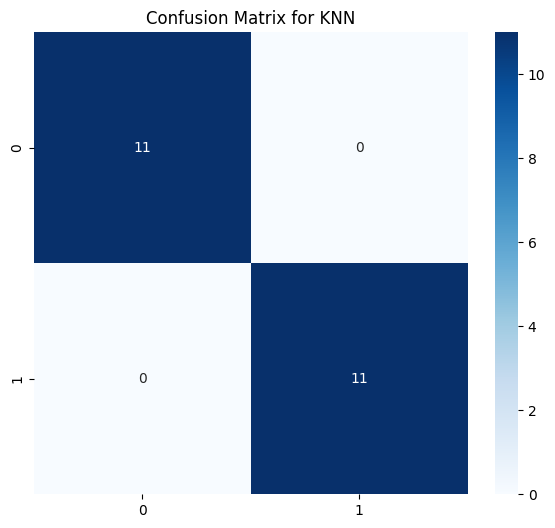

In [40]:
cm=confusion_matrix(y_test_enc,knn_predictions)
plt.figure(figsize=(7, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

plt.title('Confusion Matrix for KNN')
plt.show()

In [41]:
from sklearn.model_selection import cross_val_score

In [42]:
knn=KNeighborsClassifier(n_neighbors=5)
score_sc=cross_val_score(knn,x_train_scl,y_train_enc,cv=5)
print(score_sc)
print(f"Rata score dengan 5 fold : {score_sc.mean()}")

[1.         0.94117647 0.94117647 1.         0.88235294]
Rata score dengan 5 fold : 0.9529411764705882


In [43]:
n_=range(1,51,2)
train,test=[],[]
for n in n_:
  knn=KNeighborsClassifier(n_neighbors=n)
  knn.fit(x_train_scl,y_train_enc)
  train.append(knn.score(x_train_scl,y_train_enc))
  test.append(knn.score(x_test_scl,y_test_enc))

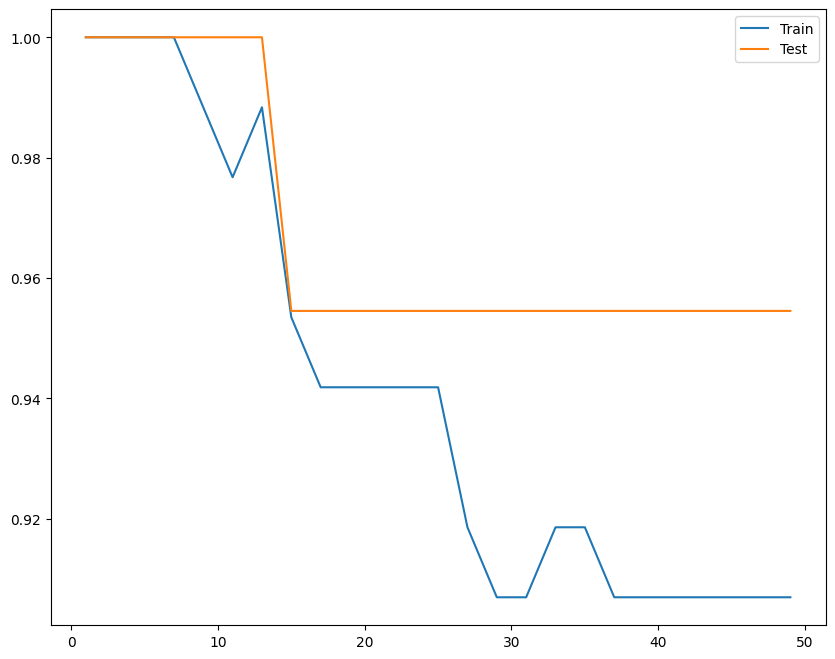

In [44]:
plt.figure(figsize=(10,8))
plt.plot(n_,train, label='Train')
plt.plot(n_,test, label='Test')

plt.legend()
plt.show()

In [45]:
print(f"Max Test Score adalah {np.max(test)}")
print(f"K Neighboard terbaik adalah {n_[np.argmax(test)]}")

Max Test Score adalah 1.0
K Neighboard terbaik adalah 1
